Load & Clean the Raw Text

In [76]:
import re

def load_and_split_by_roman(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # # Remove Project Gutenberg-style headers and footers (optional)
    # text = re.sub(r'^\s*.*START OF.*?\n', '', text, flags=re.DOTALL)
    # text = re.sub(r'\n.*END OF.*$', '', text, flags=re.DOTALL)

    # Split the text into chapters based on Roman numeral headings (Co-pilot suggestion)
    chapters = re.split(r'\n+(?=[IVXLCDM]+\s*\n)', text)
    return chapters

In [77]:
the_awakening_path = 'data/EN_1899_Chopin,Kate_TheAwakening_Novel.txt'
chapters = load_and_split_by_roman(the_awakening_path)

# Example usage
# for i, chapter in enumerate(chapters):
#     print(f"Chapter {i+1}:\n{chapter[:100]}...\n")  # Print the first 100 characters of each chapter

In [78]:
def tokenize_each_Chapter(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.lower().split()  # Normalize to lowercase and split into words

In [81]:
print(tokenize_each_Chapter(chapters[0]))  # Example tokenization of the first chapter

['i', 'a', 'green', 'and', 'yellow', 'parrot', 'which', 'hung', 'in', 'a', 'cage', 'outside', 'the', 'door', 'kept', 'repeating', 'over', 'and', 'over', 'allez', 'vousen', 'allez', 'vousen', 'sapristi', 'thats', 'all', 'right', 'he', 'could', 'speak', 'a', 'little', 'spanish', 'and', 'also', 'a', 'language', 'which', 'nobody', 'understood', 'unless', 'it', 'was', 'the', 'mockingbird', 'that', 'hung', 'on', 'the', 'other', 'side', 'of', 'the', 'door', 'whistling', 'his', 'fluty', 'notes', 'out', 'upon', 'the', 'breeze', 'with', 'maddening', 'persistence', 'mr', 'pontellier', 'unable', 'to', 'read', 'his', 'newspaper', 'with', 'any', 'degree', 'of', 'comfort', 'arose', 'with', 'an', 'expression', 'and', 'an', 'exclamation', 'of', 'disgust', 'he', 'walked', 'down', 'the', 'gallery', 'and', 'across', 'the', 'narrow', 'bridges', 'which', 'connected', 'the', 'lebrun', 'cottages', 'one', 'with', 'the', 'other', 'he', 'had', 'been', 'seated', 'before', 'the', 'door', 'of', 'the', 'main', 'hous

Tokenize The Chapters

In [82]:
tokenize_each_Chapter = [tokenize_each_Chapter(ch) for ch in chapters]

In [83]:
#Create a list of target words to track
gender_words = ["woman", "man", "girl", "boy", "mother", "father", "daughter", "son", "sister", "brother"
                ,"weak", "strong", "emotional", "ladylike", "masculine", "feminine", "gentle", "tough", "nurturing", "assertive"]

In [84]:
from collections import Counter

# Create a function to count occurrences of the target words in each chapter
def count_gender_terms(token_Chapters, gender_words):
    # Create a dictionary to hold the counts for each word from the chapters
    trend = {word: [] for word in gender_words}

    # Iterate through each chapter and count occurrences of the target words
    for chapter in token_Chapters:
        word_count = Counter(chapter)
        for word in gender_words:
            trend[word].append(word_count.get(word, 0))
    return trend

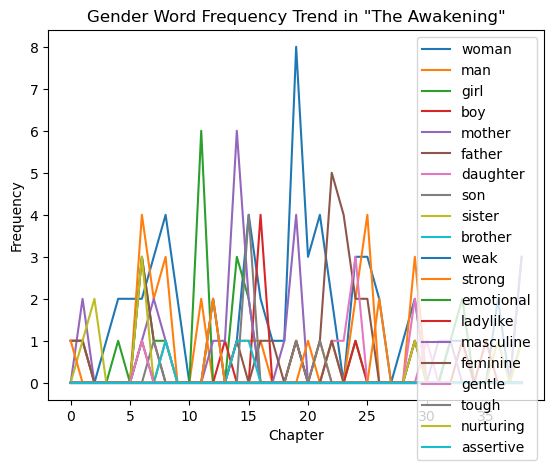

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of gender-related terms in each chapter
trend_data = count_gender_terms(tokenize_each_Chapter, gender_words)

# Plots the words in gender_words
for word in gender_words:
    plt.plot(trend_data[word], label=word)


plt.title('Gender Word Frequency Trend in "The Awakening"')
plt.xlabel('Chapter')
plt.ylabel('Frequency') 
plt.legend()
plt.show()

Total Gendered Words Per Chapter

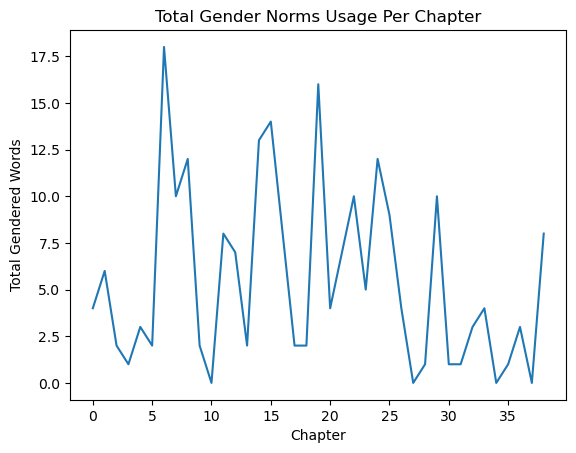

In [86]:
total_per_chapter = [
    sum(trend_data[word][i] for word in gender_words)
    for i in range(len(tokenize_each_Chapter))
]

plt.plot(total_per_chapter)
plt.xlabel("Chapter")
plt.ylabel("Total Gendered Words")
plt.title("Total Gender Norms Usage Per Chapter")
plt.show()
